In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#Import the citipy module
from citipy import citipy

# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

# Import the datetime module from the datetime library.
from datetime import datetime

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

597

In [5]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [6]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create and initialize counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | geraldton
Processing Record 2 of Set 1 | vaini
Processing Record 3 of Set 1 | axim
Processing Record 4 of Set 1 | abha
Processing Record 5 of Set 1 | upernavik
Processing Record 6 of Set 1 | hobart
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | santa maria del oro
Processing Record 9 of Set 1 | lebu
Processing Record 10 of Set 1 | khatanga
Processing Record 11 of Set 1 | tuktoyaktuk
Processing Record 12 of Set 1 | puerto ayora
Processing Record 13 of Set 1 | popondetta
Processing Record 14 of Set 1 | rikitea
Processing Record 15 of Set 1 | port hedland
Processing Record 16 of Set 1 | san patricio
Processing Record 17 of Set 1 | kapaa
Processing Record 18 of Set 1 | butaritari
Processing Record 19 of Set 1 | hasaki
Processing Record 20 of Set 1 | airai
Processing Record 21 of Set 1 | pangai
Processing Record 22 of Set 1 | rosetta
Processing Record 23 of Set 1 | arraial do cab

Processing Record 41 of Set 4 | prokopyevsk
Processing Record 42 of Set 4 | romny
Processing Record 43 of Set 4 | mianyang
Processing Record 44 of Set 4 | castro
Processing Record 45 of Set 4 | jiamusi
Processing Record 46 of Set 4 | saldanha
Processing Record 47 of Set 4 | omboue
Processing Record 48 of Set 4 | guerrero negro
Processing Record 49 of Set 4 | tuy hoa
Processing Record 50 of Set 4 | vila franca do campo
Processing Record 1 of Set 5 | svetlogorsk
Processing Record 2 of Set 5 | emirdag
Processing Record 3 of Set 5 | bonthe
Processing Record 4 of Set 5 | port alfred
Processing Record 5 of Set 5 | sabha
Processing Record 6 of Set 5 | ayodhya
Processing Record 7 of Set 5 | roald
Processing Record 8 of Set 5 | hualmay
Processing Record 9 of Set 5 | dunkwa
Processing Record 10 of Set 5 | garoua boulai
Processing Record 11 of Set 5 | geresk
City not found. Skipping...
Processing Record 12 of Set 5 | filingue
Processing Record 13 of Set 5 | chokurdakh
Processing Record 14 of Set 

Processing Record 29 of Set 8 | sola
Processing Record 30 of Set 8 | fomboni
Processing Record 31 of Set 8 | klaksvik
Processing Record 32 of Set 8 | alugan
Processing Record 33 of Set 8 | wasilla
Processing Record 34 of Set 8 | polyarnyy
Processing Record 35 of Set 8 | kamenskoye
City not found. Skipping...
Processing Record 36 of Set 8 | rungata
City not found. Skipping...
Processing Record 37 of Set 8 | panaba
Processing Record 38 of Set 8 | torbay
Processing Record 39 of Set 8 | rapar
Processing Record 40 of Set 8 | mackay
Processing Record 41 of Set 8 | quatre cocos
Processing Record 42 of Set 8 | andippatti
Processing Record 43 of Set 8 | beringovskiy
Processing Record 44 of Set 8 | ayan
Processing Record 45 of Set 8 | sedelnikovo
City not found. Skipping...
Processing Record 46 of Set 8 | bani walid
Processing Record 47 of Set 8 | hargeysa
Processing Record 48 of Set 8 | lima
Processing Record 49 of Set 8 | uporovo
Processing Record 50 of Set 8 | bolungarvik
City not found. Skip

Processing Record 13 of Set 12 | severo-yeniseyskiy
Processing Record 14 of Set 12 | aripuana
Processing Record 15 of Set 12 | hobyo
Processing Record 16 of Set 12 | whithorn
Processing Record 17 of Set 12 | zhezkazgan
Processing Record 18 of Set 12 | champerico
Processing Record 19 of Set 12 | fairbanks
Processing Record 20 of Set 12 | atambua
Processing Record 21 of Set 12 | imbituba
Processing Record 22 of Set 12 | bargal
City not found. Skipping...
Processing Record 23 of Set 12 | loikaw
Processing Record 24 of Set 12 | south charleston
Processing Record 25 of Set 12 | port augusta
Processing Record 26 of Set 12 | deputatskiy
Processing Record 27 of Set 12 | marquette
Processing Record 28 of Set 12 | muli
Processing Record 29 of Set 12 | hailar
Processing Record 30 of Set 12 | bella vista
Processing Record 31 of Set 12 | trastenik
Processing Record 32 of Set 12 | orapa
Processing Record 33 of Set 12 | banda aceh
Processing Record 34 of Set 12 | galgani
City not found. Skipping...
P

In [7]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Geraldton,-28.7667,114.6000,63.01,94,90,8.05,AU,2021-08-07 22:17:29
1,Vaini,-21.2000,-175.2000,71.76,73,75,5.75,TO,2021-08-07 22:17:29
2,Axim,4.8699,-2.2405,76.15,88,19,10.49,GH,2021-08-07 22:17:29
3,Abha,18.2164,42.5053,64.22,77,0,0.00,SA,2021-08-07 22:15:38
4,Upernavik,72.7868,-56.1549,40.84,95,100,9.42,GL,2021-08-07 22:17:30
5,Hobart,-42.8794,147.3294,36.27,88,0,1.99,AU,2021-08-07 22:17:30
6,Bethel,41.3712,-73.4140,82.08,72,100,6.58,US,2021-08-07 22:17:30
7,Santa Maria Del Oro,25.9333,-105.3667,82.24,40,60,9.55,MX,2021-08-07 22:17:31
8,Lebu,-37.6167,-73.6500,48.76,75,27,21.70,CL,2021-08-07 22:17:31
9,Khatanga,71.9667,102.5000,51.87,69,37,7.00,RU,2021-08-07 22:17:31


In [8]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Geraldton,AU,2021-08-07 22:17:29,-28.7667,114.6000,63.01,94,90,8.05
1,Vaini,TO,2021-08-07 22:17:29,-21.2000,-175.2000,71.76,73,75,5.75
2,Axim,GH,2021-08-07 22:17:29,4.8699,-2.2405,76.15,88,19,10.49
3,Abha,SA,2021-08-07 22:15:38,18.2164,42.5053,64.22,77,0,0.00
4,Upernavik,GL,2021-08-07 22:17:30,72.7868,-56.1549,40.84,95,100,9.42
...,...,...,...,...,...,...,...,...,...
540,Natal,BR,2021-08-07 22:19:20,-5.7950,-35.2094,77.65,78,20,14.97
541,Varkaus,FI,2021-08-07 22:20:23,62.3153,27.8730,59.31,95,100,13.98
542,Lodwar,KE,2021-08-07 22:20:23,3.1191,35.5973,83.93,38,34,15.08
543,Atherton,GB,2021-08-07 22:20:23,53.5237,-2.4935,60.71,96,100,5.01


In [9]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [10]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

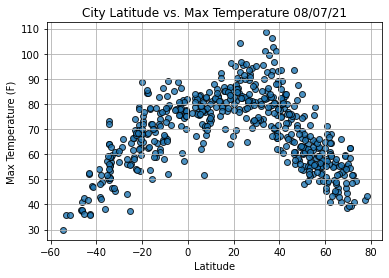

In [11]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/lat_vs_temperature.png")

# Show plot.
plt.show()

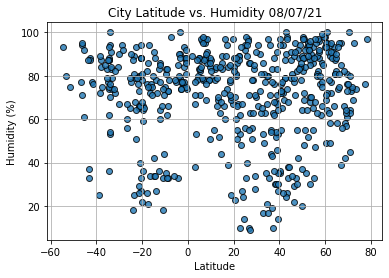

In [16]:
# Build the scatter plot for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/lat_vs_humidity.png")

# Show plot.
plt.show()

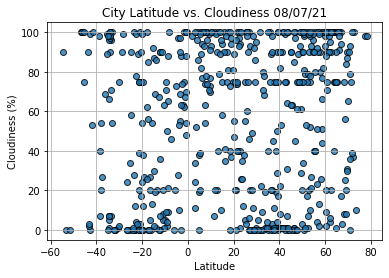

In [17]:
# Build the scatter plot for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/lat_vs_cloudiness.png")

# Show plot.
plt.show()

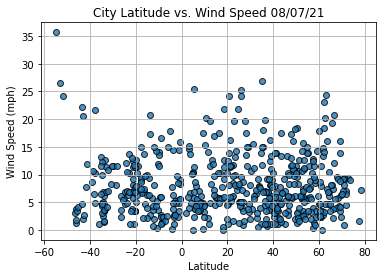

In [18]:
# Build the scatter plot for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/lat_vs_windspeed.png")

# Show plot.
plt.show()